In [1]:
#import lib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import re

In [2]:
english_dataset = "IMDB_Dataset.csv"
data = pd.read_csv(english_dataset)


In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
data.shape

(50000, 2)

In [5]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
missing_values=data.isnull().sum() # missing values

percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
review,0,0.0
sentiment,0,0.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6684\1941095395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment',data=data, palette="PuRd")


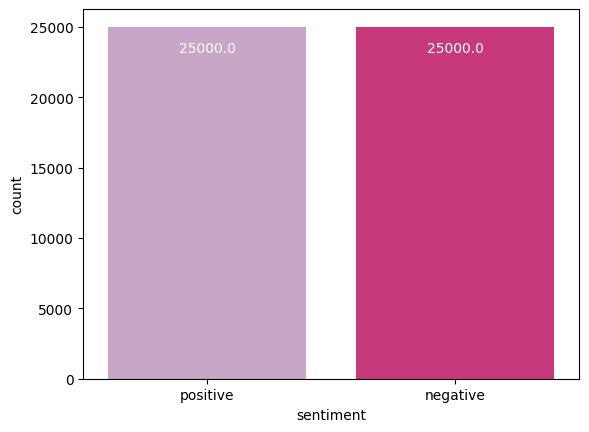

In [8]:
ax = sns.countplot(x='sentiment',data=data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

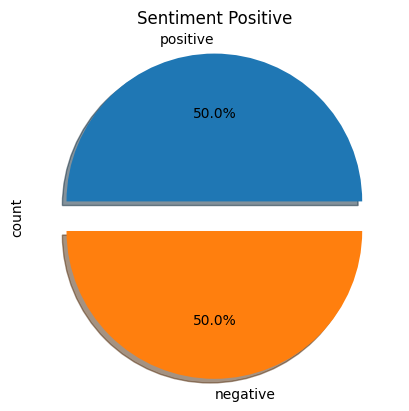

In [9]:
data["sentiment"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Sentiment Positive');

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=99)

In [11]:
def pre_process(text):
    text = text.lower()
    re.sub(r'[^\w\s]', '', text)
    return text

# Apply cleaning function to the text data
x_train = x_train.apply(pre_process)
x_test = x_test.apply(pre_process)

In [12]:
vectorizer = TfidfVectorizer(max_features=54000)

x_train_tfidf = vectorizer.fit_transform(x_train)

x_test_tfidf = vectorizer.transform(x_test)


In [13]:
accuracies = {}
algo_time={}

In [14]:
def print_performance(yt,clf,clf_name):
    y_pred=clf.predict(x_test_tfidf)
    accuracies[clf_name]=accuracy_score(y_test, y_pred)*100
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))

    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

LOGISTIC REGRESSION

Accuracy Score : 90.79 %

Classification Report :  
               precision    recall  f1-score   support

    negative       0.92      0.89      0.91      4969
    positive       0.90      0.92      0.91      5031

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



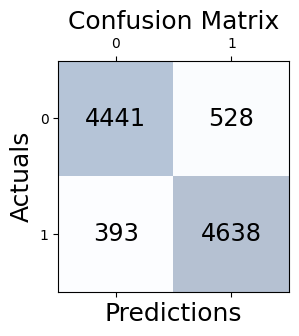

In [23]:
print("LOGISTIC REGRESSION")
start = time.time()
model_LR = LogisticRegression()
model_LR.fit(x_train_tfidf, y_train)
end = time.time()
print_performance(y_test,model_LR,'LOGISTIC REGRESSION')
algo_time['LOGISTIC REGRESSION']=end-start

NAIVE BAYES

Accuracy Score : 87.67 %

Classification Report :  
               precision    recall  f1-score   support

    negative       0.86      0.89      0.88      4969
    positive       0.89      0.86      0.88      5031

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



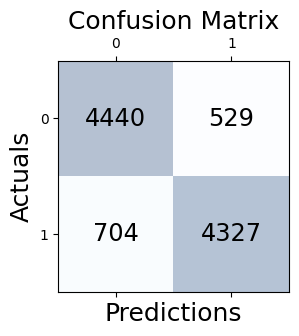

In [16]:
print("NAIVE BAYES")
start = time.time()
model_NB =  MultinomialNB()
model_NB.fit(x_train_tfidf, y_train)
end = time.time()
print_performance(y_test,model_NB,"NAIVE BAYES")
algo_time["NAIVE BAYES"]=end-start

In [17]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [18]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [19]:
def predict_rating(review):
    review_tfidf = vectorizer.transform([review])
    predicted_rating = model_LR.predict(review_tfidf)
    return predicted_rating

In [20]:
new_review = input("Enter your review: ")
predicted_rating = predict_rating(new_review)
print("Predicted rating:", predicted_rating)

Predicted rating: ['negative']
